# Email Spam Detection

# Setup



---
import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

---
import dataset

In [2]:

from google.colab import drive

drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/ML_Projects/email_spam_detection/email_spam.csv'

df = pd.read_csv(file_path, encoding='latin-1')

print(df)

Mounted at /content/drive
        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1  


---
check colums and null values in rows

In [3]:
print("columns names:")
print(df.columns)
print("\n\n null values:")
print(df.isnull().sum())

columns names:
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


 null values:
v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


---
drop unwanted columns

In [4]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


---
rename the columns

In [5]:
df.rename(columns={'v1':'spam', 'v2':'body'}, inplace=True)
print(df)

      spam                                               body
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


---
categorise the spam column 1 : spam, 0 : ham

In [6]:
df['spam'] = df['spam'].map({'spam': 1, 'ham': 0})
print(df)

      spam                                               body
0        0  Go until jurong point, crazy.. Available only ...
1        0                      Ok lar... Joking wif u oni...
2        1  Free entry in 2 a wkly comp to win FA Cup fina...
3        0  U dun say so early hor... U c already then say...
4        0  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567     1  This is the 2nd time we have tried 2 contact u...
5568     0              Will Ì_ b going to esplanade fr home?
5569     0  Pity, * was in mood for that. So...any other s...
5570     0  The guy did some bitching but I acted like i'd...
5571     0                         Rofl. Its true to its name

[5572 rows x 2 columns]


# Data Visualisation

---
bar plot for spam and ham

<ipython-input-7-a66a3ffad676>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=df, palette=['lightgreen', 'salmon'])


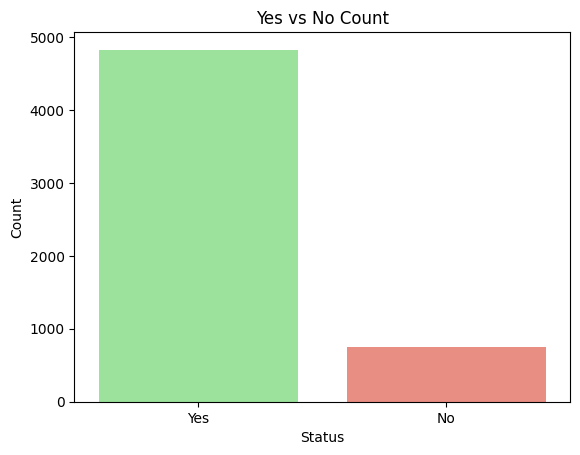

In [7]:
sns.countplot(x='spam', data=df, palette=['lightgreen', 'salmon'])
plt.title('Yes vs No Count')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
plt.show()

# Train The Models

In [8]:
# 1. Prepare data
X = df['body']
y = df['spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
1.   MultinomialNB() (Naive Bayes) for quick and strong baseline



In [9]:
from sklearn.naive_bayes import MultinomialNB #model1

vectorizer1 = TfidfVectorizer()
# vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Unigrams + bigrams

X1_train_vec = vectorizer1.fit_transform(X_train)
X1_test_vec = vectorizer1.transform(X_test)

# Train model
model1 = MultinomialNB()
model1.fit(X1_train_vec, y_train)

# Predict
y1_pred = model1.predict(X1_test_vec)

# Evaluate
print(classification_report(y_test, y1_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y1_pred)
print(f"\nAccuracy of the model: {accuracy}")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115


Accuracy of the model: 0.9623318385650225


---
2. LogisticRegression() if you want interpretable coefficients

In [10]:
from sklearn.linear_model import LogisticRegression #model2

# TF-IDF vectorizer
vectorizer2 = TfidfVectorizer()
X2_train_vec = vectorizer2.fit_transform(X_train)
X2_test_vec = vectorizer2.transform(X_test)

# Logistic Regression model
model2 = LogisticRegression(max_iter=1000)
model2.fit(X2_train_vec, y_train)

# Predict
y2_pred = model2.predict(X2_test_vec)

# Evaluate
print(classification_report(y_test, y2_pred))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y2_pred)
print(f"\nAccuracy of the model: {accuracy}")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


Accuracy of the model: 0.967713004484305


---
3. Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier #model3

# 2. Vectorize the text data using TF-IDF (you can use n-grams as well)
vectorizer3 = TfidfVectorizer(ngram_range=(1, 3), stop_words='english')
X3_train_vec = vectorizer3.fit_transform(X_train)
X3_test_vec = vectorizer3.transform(X_test)

# 3. Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X3_train_vec, y_train)

# 4. Predict and evaluate the model
rf_predictions = rf_model.predict(X3_test_vec)

# Print the classification report
print(classification_report(y_test, rf_predictions))

# Calculate and print accuracy
accuracy = accuracy_score(y_test, rf_predictions)
print(f"\nAccuracy of the model: {accuracy}")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Accuracy of the model: 0.9668161434977578


---
4. stacking model (logistic + random forest)

In [12]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier

# 2. Vectorizer
vectorizer4 = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X_train_vec = vectorizer4.fit_transform(X_train)
X_test_vec = vectorizer4.transform(X_test)

# 4. Define stacking model
stacking_model = StackingClassifier(
    estimators=[
        ('lr', model2),
        ('rf', rf_model)
    ],
    final_estimator=LogisticRegression(),  # meta-model
    passthrough=True,  # optional: pass original features too
    n_jobs=-1
)

# 5. Train stacking model
stacking_model.fit(X_train_vec, y_train)

# 6. Predict
y_pred_stack = stacking_model.predict(X_test_vec)

# 7. Evaluate
print(classification_report(y_test, y_pred_stack))
print(f"\nAccuracy of Stacking Model: {accuracy_score(y_test, y_pred_stack)}")


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.88      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Accuracy of Stacking Model: 0.9820627802690582


# Test the models

In [ ]:
# Demo  messages
demo_spam_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim your prize now!",
    "URGENT! Your account has been suspended. Verify immediately to avoid closure.",
    "Win a brand new iPhone 15! Limited entries available. Act now!",
    "You have been selected for a free vacation package. Call today!",
    "You’ve been selected to receive a free gift card worth $500! Click here to claim it now!",
    "Hurry up! Limited time offer to get a free subscription to premium content. Sign up today!",
    "Act now and win a chance to fly first class for free! Don’t miss this once-in-a-lifetime opportunity.",
    "Congratulations, you’ve been selected to win a $2000 cash prize! Click here to claim your winnings.",
    "Your account has been compromised! Click this link to reset your password immediately."
]

demo_ham_messages = [
    "Hey, how are you doing today? Let's catch up sometime this week!",
    "I’ll be at the office around 9 AM tomorrow. Can we meet for a quick discussion?",
    "Do you want to join the team for lunch? We're going to the new Italian restaurant.",
    "The meeting has been rescheduled for next Monday at 10 AM.",
    "Can you send me the updated project report by tomorrow?"
]

model_vectorizers = {
    "mnb": (model1, vectorizer1),
    "Logistic Regression": (model2, vectorizer2),
    "Random Forest": (rf_model, vectorizer3),
    "stacking (LR + RF)": (stacking_model, vectorizer4)
}

---
spam message check

In [ ]:

custom_spam_test_df = pd.DataFrame({'body': demo_spam_messages + ["total"]})

for name, (model, vect) in model_vectorizers.items():
    demo_vecs = vect.transform(demo_spam_messages)
    preds = model.predict(demo_vecs)
    spam = 0
    for msg, pred in zip(demo_spam_messages, preds):
        if pred == 1:
            spam += 1
    custom_spam_test_df[name] = preds.tolist() + [spam]

custom_spam_test_df


,body,mnb,Logistic Regression,Random Forest,stacking (LR + RF)
0,Congratulations! You've won a $1000 Walmart gi...,1,1,1,1
1,URGENT! Your account has been suspended. Verif...,0,0,0,1
2,Win a brand new iPhone 15! Limited entries ava...,0,0,0,0
3,You have been selected for a free vacation pac...,0,1,0,0
4,You’ve been selected to receive a free gift ca...,1,1,1,1
5,Hurry up! Limited time offer to get a free sub...,0,0,0,1
6,Act now and win a chance to fly first class fo...,0,0,0,0
7,"Congratulations, you’ve been selected to win a...",1,1,1,1
8,Your account has been compromised! Click this ...,0,0,0,0
9,total,3,4,3,5


---
ham message check

In [ ]:

custom_ham_test_df = pd.DataFrame({'body': demo_ham_messages + ["total"]})

for name, (model, vect) in model_vectorizers.items():
    demo_vecs = vect.transform(demo_ham_messages)
    preds = model.predict(demo_vecs)
    spam = 0
    for msg, pred in zip(demo_ham_messages, preds):
        if pred == 1:
            spam += 1
    custom_ham_test_df[name] = preds.tolist() + [spam]

custom_ham_test_df

,body,mnb,Logistic Regression,Random Forest,stacking (LR + RF)
0,"Hey, how are you doing today? Let's catch up s...",0,0,0,0
1,I’ll be at the office around 9 AM tomorrow. Ca...,0,0,0,0
2,Do you want to join the team for lunch? We're ...,0,0,0,0
3,The meeting has been rescheduled for next Mond...,0,0,0,0
4,Can you send me the updated project report by ...,0,0,0,0
5,total,0,0,0,0


# Save as pickle file

In [ ]:
import pickle

pickle.dump(stacking_model, open('model.pkl', 'wb'))
pickle.dump(vectorizer4, open('vectorizer.pkl', 'wb'))


In [13]:
import joblib

joblib.dump(stacking_model, "model.pkl")
joblib.dump(vectorizer4, "vectorizer.pkl")

['vectorizer.pkl']